<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости нашего кода. Эти функции инициализируют генераторы псевдослуйайных чисел и мы можем быть уверены, что на разных компьютерах рандомы будут выполняться одинаково.`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [62]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [63]:
df_train.isna().sum() # столбцы с пропусками: mileage, engine, max_power, torque, seats

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [64]:
print(df_train.duplicated().sum()) # количество дубликатов

985


In [65]:
from ydata_profiling import ProfileReport
ProfileReport(df_train, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

`В отчете видим также пропуски и дубликаты. Еще видим корреляцию цены с пробегом, годом, количеством владельцев и коробкой передач. Также год сильно коррелирует с пробегом, что логично.`

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [66]:
pd.concat([df_train, df_test]).describe(include=[np.number])

year  selling_price     km_driven        seats
count  7999.000000   7.999000e+03  7.999000e+03  7778.000000
mean   2013.801225   6.368131e+05  6.981073e+04     5.417974
std       4.048004   8.028019e+05  5.665201e+04     0.960059
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.534995e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [67]:
pd.concat([df_train, df_test]).describe(include=[object])

name    fuel seller_type transmission        owner  \
count                     7999    7999        7999         7999         7999   
unique                    2045       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       128    4327        6663         6972         5210   

          mileage   engine max_power          torque  
count        7778     7778      7784            7777  
unique        392      121       322             439  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          219     1001       373             522

In [68]:
df_compare = pd.DataFrame({'mean train':df_train.mean(numeric_only=True),
                           'mean test':df_test.mean(numeric_only=True),
                           'median train':df_train.median(numeric_only=True),
                           'median test':df_test.median(numeric_only=True)})
df_compare

mean train      mean test  median train  median test
year             2013.818403    2013.681000        2015.0       2014.0
selling_price  639515.197171  617901.042000      450000.0     434999.0
km_driven       69584.615517   71393.341000       60000.0      61500.0
seats               5.419008       5.410805           5.0          5.0

`Кажется, что данные между трейном и тестом распределены равномерно`

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [69]:
duplicates = df_train.duplicated(subset=df_train.columns.difference(['selling_price']))
print(duplicates.sum())

1159


In [70]:
df_train[duplicates]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [71]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']))
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
6992  Petrol  Individual       Manual           First Owner  17.92 kmpl   
6993  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
6994  Petrol  Individual       Manual           First Owner   18.5 kmpl   
6995  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
6996  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
6992  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
6993   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
6994  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [72]:
df_train = df_train.reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [73]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [74]:
df_train['mileage'] = df_train['mileage'].str.split(' ').str[0]
df_train['engine'] = df_train['engine'].str.split(' ').str[0]
df_train['max_power'] = df_train['max_power'].str.split(' ').str[0]

# В данных столбцах у нас есть пустые строки, которые нужно обработать перед приведением типов
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].replace('', np.nan).astype(float)

df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
5835      62.10            96.1Nm@ 3000rpm    5.0  
5836      67.10              90Nm@ 3500rpm    5.0  
5837      82.85           113.7Nm@ 4000rpm    5.0  
5838     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [75]:
df_train['torque'] = df_train['torque'].str.lower().str.replace('at', '@').str.replace('/', '@')
df_train['max_torque_rpm'] = df_train['torque'].str.split('@').str[1].str.replace(',', '').str.extract(r'(\d*-?\d+)')
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].str.split('-').str[-1].astype('float')
df_train['torque_new'] = df_train['torque'].str.split('@').str[0].str.extract(r'(\d*\.?\d+)').astype('float')
df_train['torque_new'] = df_train['torque_new'].where(df_train['torque'].str.contains('kgm') == False, df_train['torque_new'] * 9.81)
df_train.drop('torque', axis=1, inplace=True, errors='ignore')
df_train.rename(columns={"torque_new": "torque"}, inplace=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  seats  max_torque_rpm   torque  
0         74.00    5.0          2000.0  190.000  
1        103.52    5.0          2500.0  250.000  
2         90.00    5.0          2750.0  219.744  
3         88.20    5.0          4500.0  112.815  
4         81.86    5.0          4000.0  113.750  
...         ...    ...             ...      ...  
5835      62.10    5.0          3000.0   96.100  
5836      67.10    5.0          3500.0   90.000  
5837      82.85    5.0          4000.0  113.700  
5838     110.00    5.0          2750.0  235.440  
5839      73.90    5.0          2000.0  190.000  

[5840 rows x 14 columns]

In [76]:
# Повторим все для тестового датасета
df_test['mileage'] = df_test['mileage'].str.split(' ').str[0]
df_test['engine'] = df_test['engine'].str.split(' ').str[0]
df_test['max_power'] = df_test['max_power'].str.split(' ').str[0]
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].replace('', np.nan).astype(float)
df_test['torque'] = df_test['torque'].str.lower().str.replace('at', '@').str.replace('/', '@')
df_test['max_torque_rpm'] = df_test['torque'].str.split('@').str[1].str.replace(',', '').str.extract(r'(\d*-?\d+)')
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].str.split('-').str[-1].astype('float')
df_test['torque_new'] = df_test['torque'].str.split('@').str[0].str.extract(r'(\d*\.?\d+)').astype('float')
df_test['torque_new'] = df_test['torque_new'].where(df_test['torque'].str.contains('kgm') == False, df_test['torque_new'] * 9.81)
df_test.drop('torque', axis=1, inplace=True, errors='ignore')
df_test.rename(columns={"torque_new": "torque"}, inplace=True)
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power  seats  max_torque_rpm   torque  
0       112.00    7.0          2200.0  260.000  
1       108.50    5.0          2750.0  260.000  
2       130.00    5.0          4300.0  172.000  
3        98.60    5.0          1750.0  200.000  
4        65.00    5.0          3000.0   96.000  
..         ...    ...             ...      ...  
995      68.05    5.0          4500.0   99.040  
996      81.83    5.0          4000.0  114.700  
997      90.00    5.0          2750.0  219.744  
998      78.90    5.0          4000.0  111.800  
999      98.60    5.0          1750.0  200.000  

[1000 rows x 14 columns]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [77]:
def dataset_fill_na(X):
    X['mileage'] = X['mileage'].fillna(X['mileage'].median())
    X['engine'] = X['engine'].fillna(X['engine'].median())
    X['max_power'] = X['max_power'].fillna(X['max_power'].median())
    X['seats'] = X['seats'].fillna(X['seats'].median())
    X['torque'] = X['torque'].fillna(X['torque'].median())

    # Если максимальный крутящий момент не задан, то вычисляем по формуле
    X['max_torque_rpm'] = X['max_torque_rpm'].fillna(X['max_power'] * 0.7457 * 9550 / X['torque'])
    return X

df_train = dataset_fill_na(df_train)
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
max_torque_rpm    0
torque            0
dtype: int64

In [78]:
df_test = dataset_fill_na(df_test)
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
max_torque_rpm    0
torque            0
dtype: int64

`Использовать медиану для заполнения пропусков предпочтительнее, так как она более устойчива к выбросам.`

`Нужно считать медиану отдельно для теста и трейна, так как нам необходимо, чтобы тест не зависел от трейна.`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [79]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

`Это возможно, потому что, количество посадочных мест в машине, хоть и числовая величина, но конечная и с небольшим диапазоном значений`

`В данном случае есть аргумент, почему seats лучше оставить числовым. По логике - чем больше мест, тем больше автомобиль, тем больше цена. Предположу что у этого признака есть корреляция с таргетом`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [80]:
pd.concat([df_train, df_test]).describe(include=[np.number])

year  selling_price     km_driven      mileage       engine  \
count  6840.000000   6.840000e+03  6.840000e+03  6840.000000  6840.000000   
mean   2013.465351   5.368403e+05  7.357813e+04    19.417275  1433.166374   
std       4.084210   5.744082e+05  5.852456e+04     3.980835   491.184846   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.800000e+04    16.800000  1197.000000   
50%    2014.000000   4.099990e+05  6.892500e+04    19.370000  1248.000000   
75%    2017.000000   6.500000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  max_torque_rpm       torque  
count  6840.000000  6840.000000     6840.000000  6840.000000  
mean     88.338952     5.423246     3070.233343   176.214619  
std      32.149963     0.972476      913.837472   114.957724  
min       0.000000     2.000000        0.000000    47.088000  
25%      68.000000     5.000000     2400.000000   111.800000  
50%      81.860000     5.000000     3000.000000   160.000000  
75%     100.000000     5.000000     4000.000000   200.124000  
max     400.000000    14.000000    21800.000000  3727.800000

`Да, сдвиг однозначно происходит, в нашем случае небольшой, благодаря медиане. Это возникает из-за того, что реальное значение ячейки, которую мы заменили, может быть абсолютно другим, мы используем медиану для удобства, но реального значения мы не знаем.`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [81]:
%matplotlib inline
sns.pairplot(df_train[df_train.select_dtypes(include=np.number).columns])
plt.show()

`Да, на основании графиков можно предположить связь цены автомобиля с признаками (особенно заметна связь с годом, пробегом, крутящим моментом и максимальным числом оборотов двигателя. Помимо этого хорошо видна корреляция крутящего момента с объемом двигателя и мощностью`

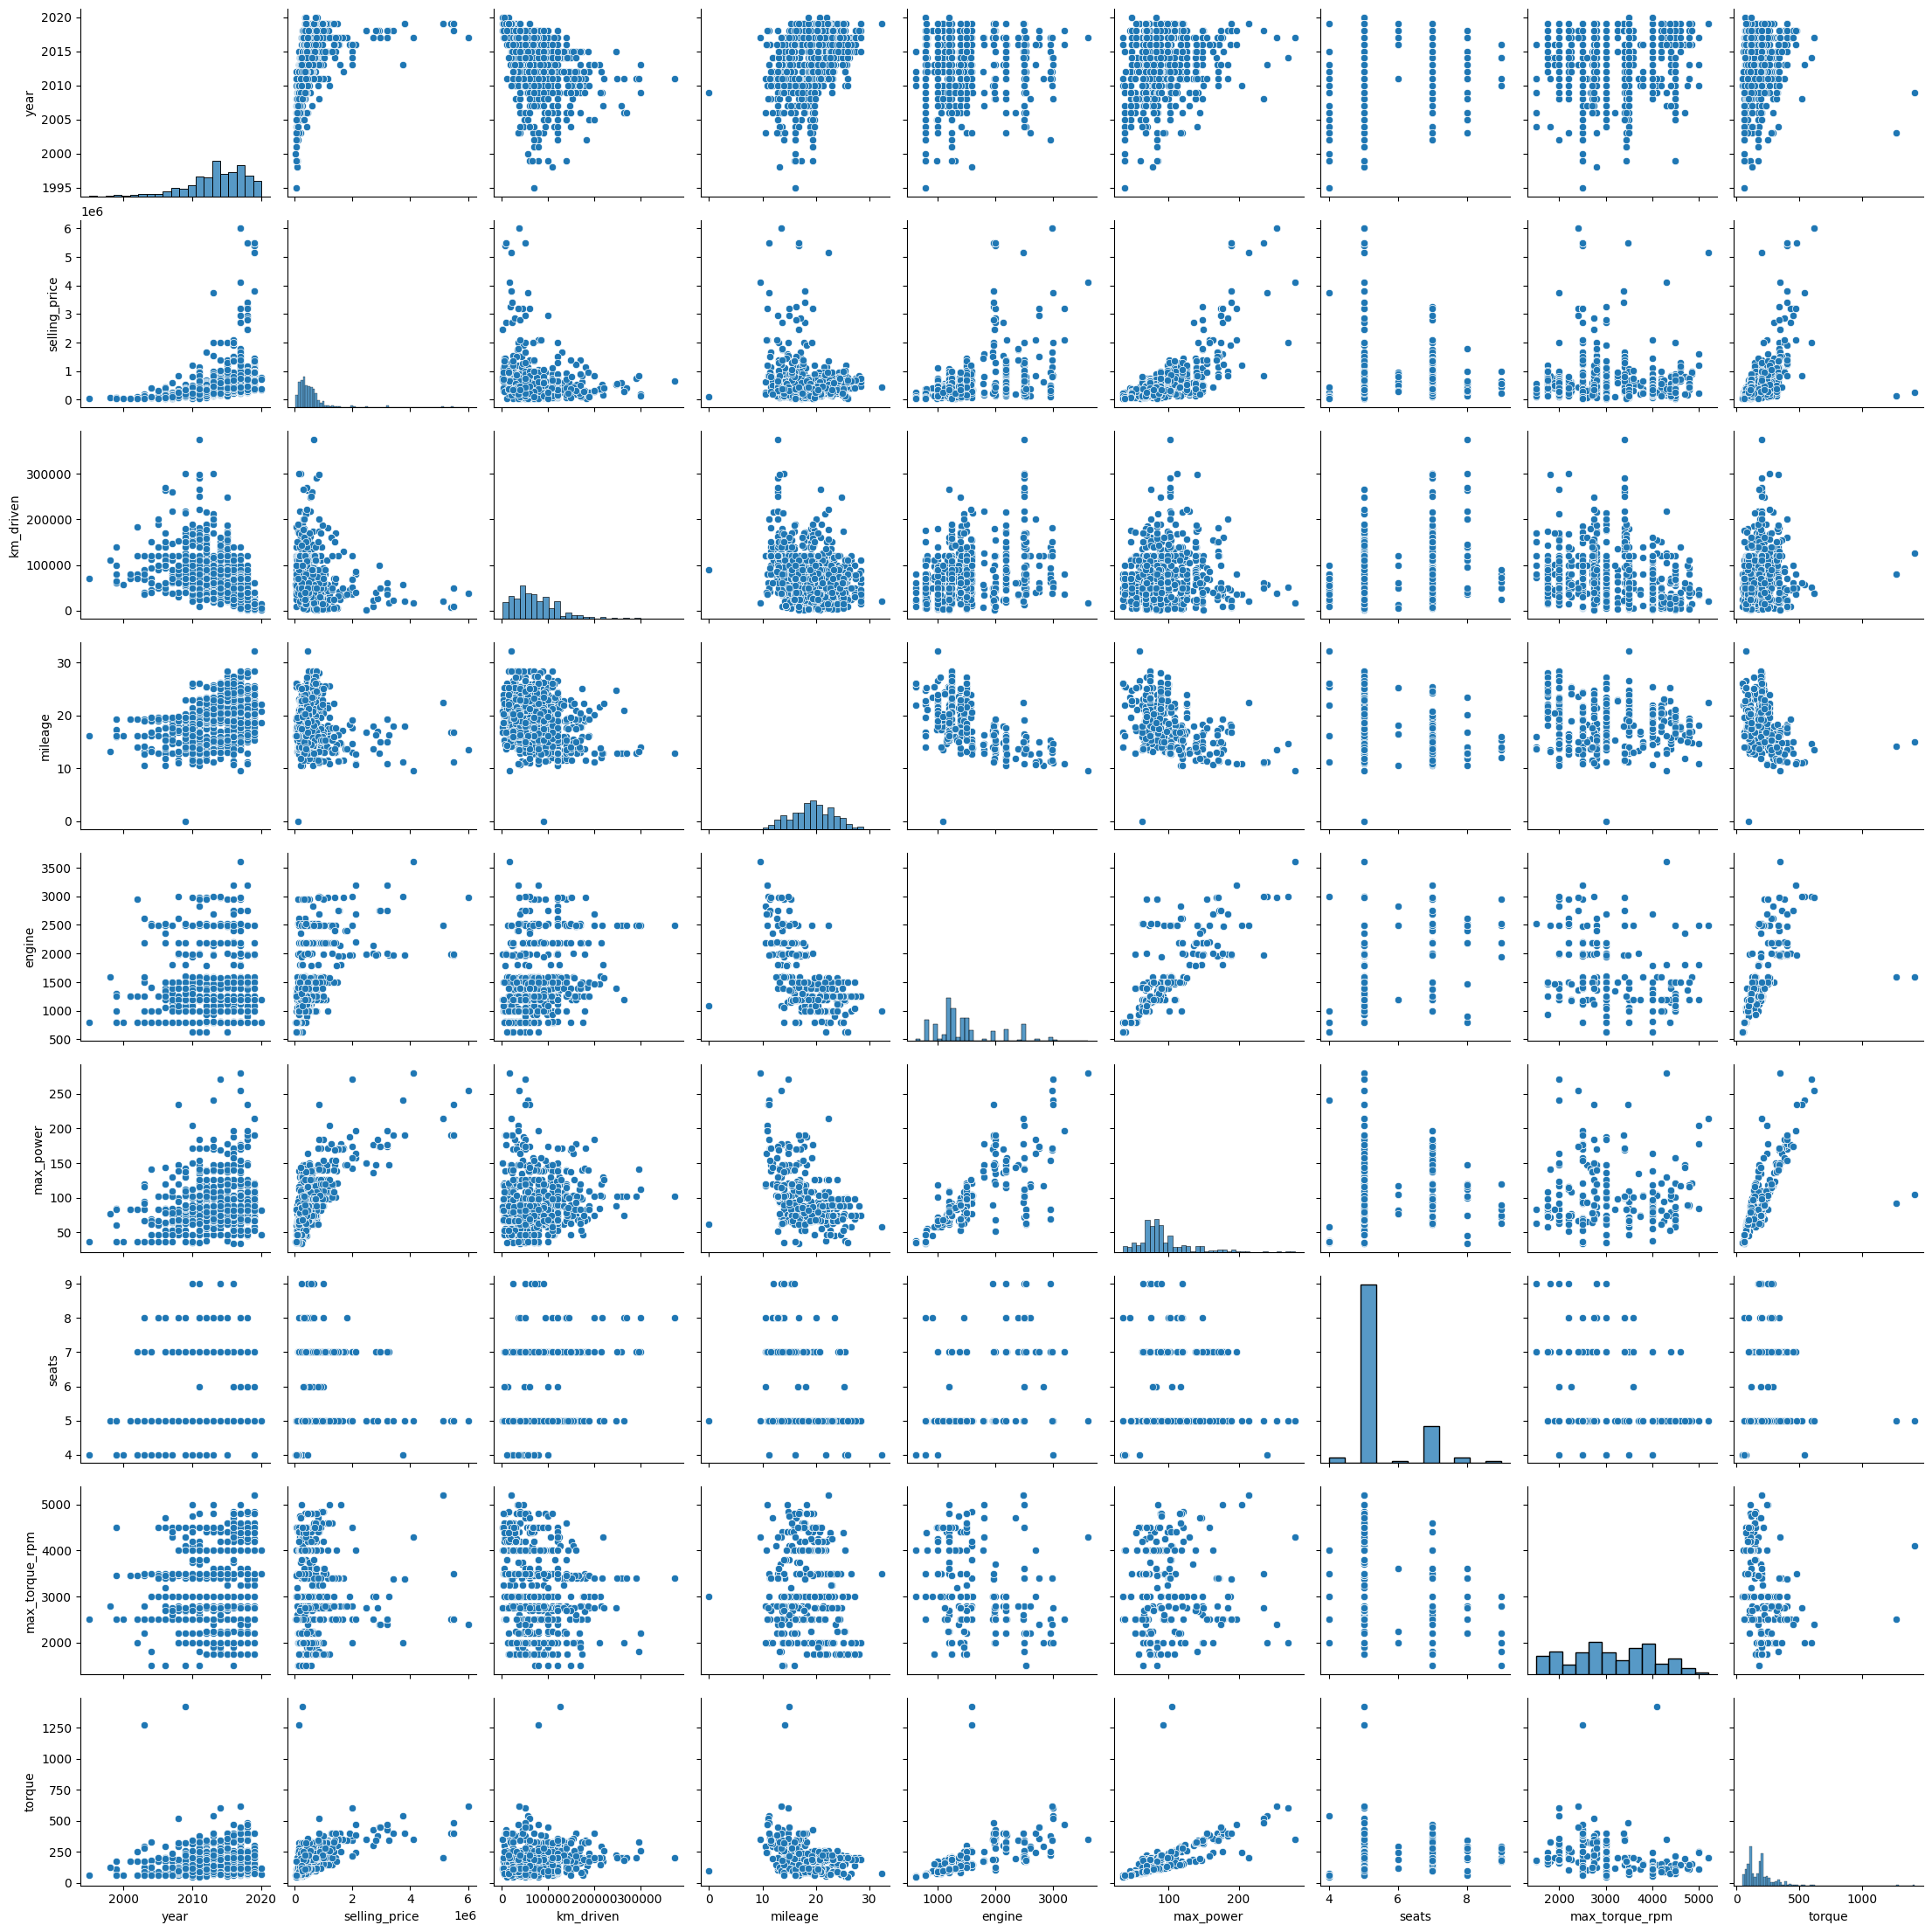

In [82]:
sns.pairplot(df_test[df_test.select_dtypes(include=np.number).columns])
plt.show()

`Да, можно с уверенностью сказать, что треин и тест имеют похожие попарные распределения`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [83]:
corr_pirs = df_train[df_train.select_dtypes(include=np.number).columns].corr()
corr_pirs

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.015526      -0.097473  -0.196763 -0.178577 -0.250965   
torque          0.048198       0.433026   0.106611 -0.226224  0.565994   

                max_power     seats  max_torque_rpm    torque  
year             0.156858  0.041178        0.015526  0.048198  
selling_price    0.692814  0.149953       -0.097473  0.433026  
km_driven        0.024588  0.192328       -0.196763  0.106611  
mileage         -0.373390 -0.451059       -0.178577 -0.226224  
engine           0.681117  0.652172       -0.250965  0.565994  
max_power        1.000000  0.244112       -0.021221  0.616096  
seats            0.244112  1.000000       -0.212419  0.298063  
max_torque_rpm  -0.021221 -0.212419        1.000000 -0.249633  
torque           0.616096  0.298063       -0.249633  1.000000

In [84]:
sns.heatmap(corr_pirs, cmap="crest")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. `Наименее скореллированы между собой признаки year и engine (год выпуска и объем двигателя), что логично`
2. `Сильная положительная зависимость наблюдается у engine и max_power (объем двигателя и мощность), что тоже логично`
3. `Да, чем меньше год, тем больше км проехал автомобиль, это верно, исходя из большого отрицательного значения корреляции`


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [85]:
corr_spearman_lib = df_train[df_train.select_dtypes(include=np.number).columns].corr(method='spearman')
corr_spearman_lib

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
seats           0.048291       0.317605   0.195317 -0.435458  0.527716   
max_torque_rpm  0.053914      -0.142534  -0.309948 -0.177548 -0.366891   
torque          0.102220       0.582099   0.243174 -0.162423  0.842430   

                max_power     seats  max_torque_rpm    torque  
year             0.165798  0.048291        0.053914  0.102220  
selling_price    0.612258  0.317605       -0.142534  0.582099  
km_driven        0.040919  0.195317       -0.309948  0.243174  
mileage         -0.308824 -0.435458       -0.177548 -0.162423  
engine           0.713113  0.527716       -0.366891  0.842430  
max_power        1.000000  0.304857       -0.016849  0.779635  
seats            0.304857  1.000000       -0.209370  0.438233  
max_torque_rpm  -0.016849 -0.209370        1.000000 -0.516047  
torque           0.779635  0.438233       -0.516047  1.000000

In [86]:
cols = df_train.select_dtypes(include=np.number).columns.to_list()
corr_spearman_my = corr_spearman_lib.copy()
for c1 in cols:
    for c2 in cols:
        corr_spearman_my.loc[c2, c1] = 1 - ((6 * ((df_train[c1].rank() - df_train[c2].rank()).pow(2)).sum())) / (df_train.shape[0] * (df_train.shape[0] - 1) * (df_train.shape[0] + 1))
corr_spearman_my

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.708146  -0.563074  0.348408 -0.031368   
selling_price   0.708146       1.000000  -0.294527  0.026349  0.465252   
km_driven      -0.563074      -0.294527   1.000000 -0.197444  0.307153   
mileage         0.348408       0.026349  -0.197444  1.000000 -0.425435   
engine         -0.031368       0.465252   0.307153 -0.425435  1.000000   
max_power       0.168797       0.612366   0.041845 -0.308490  0.714032   
seats           0.286074       0.473845   0.387720 -0.060193  0.624671   
max_torque_rpm  0.060147      -0.138796  -0.304765 -0.173724 -0.358410   
torque          0.105976       0.582461   0.244349 -0.161444  0.843027   

                max_power     seats  max_torque_rpm    torque  
year             0.168797  0.286074        0.060147  0.105976  
selling_price    0.612366  0.473845       -0.138796  0.582461  
km_driven        0.041845  0.387720       -0.304765  0.244349  
mileage         -0.308490 -0.060193       -0.173724 -0.161444  
engine           0.714032  0.624671       -0.358410  0.843027  
max_power        1.000000  0.464873       -0.013435  0.779845  
seats            0.464873  1.000000        0.103697  0.559849  
max_torque_rpm  -0.013435  0.103697        1.000000 -0.510063  
torque           0.779845  0.559849       -0.510063  1.000000

`Небольшие различия есть, но в целом получилось похоже`

In [87]:
import phik
corr_phik = df_train.phik_matrix()
corr_phik

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm', 'torque']


/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


name      year  selling_price  km_driven      fuel  \
name            1.000000  0.948995       0.994871   0.000000  1.000000   
year            0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
owner           0.830098  0.418636       0.557641   0.087887  0.030943   
mileage         0.999690  0.279253       0.649768   0.081625  0.582304   
engine          1.000000  0.213156       0.503682   0.210747  0.644421   
max_power       0.997906  0.381639       0.872166   0.000000  0.236006   
seats           0.999985  0.288178       0.196447   0.096223  0.450714   
max_torque_rpm  0.999872  0.136593       0.069833   0.000000  0.647370   
torque          1.000000  0.096307       0.423431   0.000000  0.085412   

                seller_type  transmission     owner   mileage    engine  \
name               0.799127      1.000000  0.830098  0.999690  1.000000   
year               0.232412      0.153714  0.418636  0.279253  0.213156   
selling_price      0.334505      0.463058  0.557641  0.649768  0.503682   
km_driven          0.000000      0.012824  0.087887  0.081625  0.210747   
fuel               0.050771      0.053721  0.030943  0.582304  0.644421   
seller_type        1.000000      0.127968  0.176612  0.064736  0.160346   
transmission       0.127968      1.000000  0.096990  0.331889  0.520161   
owner              0.176612      0.096990  1.000000  0.152406  0.186011   
mileage            0.064736      0.331889  0.152406  1.000000  0.588155   
engine             0.160346      0.520161  0.186011  0.588155  1.000000   
max_power          0.331904      0.511877  0.121438  0.687235  0.720780   
seats              0.032173      0.045734  0.046741  0.679979  0.603400   
max_torque_rpm     0.046652      0.138612  0.015271  0.461665  0.457353   
torque             0.074575      0.404678  0.039605  0.204598  0.466097   

                max_power     seats  max_torque_rpm    torque  
name             0.997906  0.999985        0.999872  1.000000  
year             0.381639  0.288178        0.136593  0.096307  
selling_price    0.872166  0.196447        0.069833  0.423431  
km_driven        0.000000  0.096223        0.000000  0.000000  
fuel             0.236006  0.450714        0.647370  0.085412  
seller_type      0.331904  0.032173        0.046652  0.074575  
transmission     0.511877  0.045734        0.138612  0.404678  
owner            0.121438  0.046741        0.015271  0.039605  
mileage          0.687235  0.679979        0.461665  0.204598  
engine           0.720780  0.603400        0.457353  0.466097  
max_power        1.000000  0.569587        0.202667  0.577329  
seats            0.569587  1.000000        0.184824  0.206073  
max_torque_rpm   0.202667  0.184824        1.000000  0.741589  
torque           0.577329  0.206073        0.741589  1.000000

`Здесь мы уже можем видеть корреляцию между категориальными признаками. Видно, что название авто хорошо коррелирует с ценой, а также с другими признаками автомобиля. `

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [88]:
# Можно визуализировать phik матрицу 
sns.heatmap(corr_phik, cmap="crest")
plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [89]:
numerical_train = df_train[df_train.select_dtypes(include=np.number).columns]
y_train = numerical_train['selling_price']
X_train = numerical_train.drop(['selling_price'], axis=1)
X_train

year  km_driven  mileage  engine  max_power  seats  max_torque_rpm  \
0     2014     145500    23.40    1248      74.00      5          2000.0   
1     2014     120000    21.14    1498     103.52      5          2500.0   
2     2010     127000    23.00    1396      90.00      5          2750.0   
3     2007     120000    16.10    1298      88.20      5          4500.0   
4     2017      45000    20.14    1197      81.86      5          4000.0   
...    ...        ...      ...     ...        ...    ...             ...   
5835  2008     191000    17.92    1086      62.10      5          3000.0   
5836  2013      50000    18.90     998      67.10      5          3500.0   
5837  2013     110000    18.50    1197      82.85      5          4000.0   
5838  2007     119000    16.80    1493     110.00      5          2750.0   
5839  2009     120000    19.30    1248      73.90      5          2000.0   

       torque  
0     190.000  
1     250.000  
2     219.744  
3     112.815  
4     113.750  
...       ...  
5835   96.100  
5836   90.000  
5837  113.700  
5838  235.440  
5839  190.000  

[5840 rows x 8 columns]

In [90]:
# assert X_train.shape == (5840, 6) У меня получилось 8 числовых признаков (с учетом предобработанных max_torque_rpm и torque)

In [91]:
numerical_test = df_test[df_test.select_dtypes(include=np.number).columns]
y_test = numerical_test['selling_price']
X_test = numerical_test.drop(['selling_price'], axis=1)
X_test

year  km_driven  mileage  engine  max_power  seats  max_torque_rpm  \
0    2010     168000    14.00    2498     112.00      7          2200.0   
1    2017      25000    21.50    1497     108.50      5          2750.0   
2    2007     218463    12.90    1799     130.00      5          4300.0   
3    2015     173000    25.10    1498      98.60      5          1750.0   
4    2011      70000    16.50    1172      65.00      5          3000.0   
..    ...        ...      ...     ...        ...    ...             ...   
995  2008     100000    19.81    1086      68.05      5          4500.0   
996  2017      50000    18.60    1197      81.83      5          4000.0   
997  2009      40000    23.00    1396      90.00      5          2750.0   
998  2012      25000    20.36    1197      78.90      5          4000.0   
999  2016     110000    26.00    1498      98.60      5          1750.0   

      torque  
0    260.000  
1    260.000  
2    172.000  
3    200.000  
4     96.000  
..       ...  
995   99.040  
996  114.700  
997  219.744  
998  111.800  
999  200.000  

[1000 rows x 8 columns]

In [92]:
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression().fit(X_train, y_train) 
lr_pred = lr.predict(X_test)

lr_pred_train = lr.predict(X_train)

print('R^2 train: ', r2_score(y_train, lr_pred_train))
print('MSE train: ', MSE(y_train, lr_pred_train))  

print('R^2 test:  ', r2_score(y_test, lr_pred))
print('MSE test:  ', MSE(y_test, lr_pred)) 

R^2 train:  0.6006022374105418
MSE train:  114482711012.49995
R^2 test:   0.5996145909537474
MSE test:   230152966380.76514


`R2 в районе 0.6 уже неплохо, MSE исходя из того что таргет - цена, видимо адекватные`

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [94]:
def r2_my(y_true, y_pred):
    y_avg = np.average(y_true)
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_avg)**2)

print('R^2 my train: ', r2_my(y_train, lr_pred_train))
print('R^2 my test:  ', r2_my(y_test, lr_pred))

R^2 my train:  0.6006022374105418
R^2 my test:   0.5996145909537474


$$R^2 = 1 - {\sum_{i=1}^n(y_i - y^{pred}_i)^2 \over \sum_{i=1}^n(y_i - y^{avg})^2}$$ 
`где в числителе дроби - сумма квадратов разностей истинных и предсказанных значений, а в знаменателе - дисперсия истинных значений`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [95]:
def r2_adj_my(y_true, y_pred, k):
    return 1 - (1 - r2_my(y_true, y_pred)**2) * (len(y_true) - 1) / (len(y_true) - k)

print('R^2 adj my test:  ', r2_adj_my(y_test, lr_pred, X_train.shape[1]))

R^2 adj my test:   0.3550182661561946


`Скорректированный R^2 применяется, когда нужно сравнить модели с разным количеством признаков. R^2 для этого не подходит, так как коэффициент будет увеличиваться при добавлении признаков, даже если они не влияют на таргет`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression().fit(X_train, y_train) 
lr_ss_pred = lr.predict(X_test)

lr_ss_pred_train = lr.predict(X_train)

print('R^2 train: ', r2_score(y_train, lr_ss_pred_train))
print('MSE train: ', MSE(y_train, lr_ss_pred_train))  

print('R^2 test:  ', r2_score(y_test, lr_ss_pred))
print('MSE test:  ', MSE(y_test, lr_ss_pred)) 

R^2 train:  0.6006022374105409
MSE train:  114482711012.50023
R^2 test:   0.5996145909537441
MSE test:   230152966380.767


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [97]:
lr.coef_

array([162379.32159952, -49073.90806515,  -5666.45553976,  23395.62188336,
       331580.35748684, -29377.04690348, -57500.19752379,   4835.06336238])

`Самый большой по модулю коэффициент у признака max_power, следовательно он вносит больший вес в цену`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [98]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
print(model.coef_)

lasso_pred = model.predict(X_test)
lasso_pred_train = model.predict(X_train)

print('R^2 train: ', r2_score(y_train, lasso_pred_train))
print('MSE train: ', MSE(y_train, lasso_pred_train))  

print('R^2 test:  ', r2_score(y_test, lasso_pred))
print('MSE test:  ', MSE(y_test, lasso_pred)) 



[162377.53814835 -49072.93675507  -5663.64188431  23393.76069816
 331581.4332858  -29373.3889819  -57498.27967868   4834.46137456]
R^2 train:  0.6006022373700288
MSE train:  114482711024.11255
R^2 test:   0.5996133369753172
MSE test:   230153687203.37497


### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [99]:
from sklearn.model_selection import GridSearchCV

model = Lasso()
clf = GridSearchCV(estimator=model, param_grid={'alpha':[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}, cv=10)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 10000}

`Сколько грид-сёрчу пришлось обучать моделей? 9 - по каждому из значений альфа`

`Альфа это параметр оптимизационной функции для Лассо (коэффициент регуляризации) (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1`

In [100]:
model = Lasso(alpha=10000)
model.fit(X_train, y_train)
print(model.coef_)

lasso_10000_pred = model.predict(X_test)
lasso_10000_pred_train = model.predict(X_train)

print('R^2 train: ', r2_score(y_train, lasso_10000_pred_train))
print('MSE train: ', MSE(y_train, lasso_10000_pred_train))  

print('R^2 test:  ', r2_score(y_test, lasso_10000_pred))
print('MSE test:  ', MSE(y_test, lasso_10000_pred)) 

[ 1.52109126e+05 -3.92402748e+04  0.00000000e+00  0.00000000e+00
  3.37150918e+05 -3.34430293e+02 -4.51850269e+04  0.00000000e+00]
R^2 train:  0.5979243404323228
MSE train:  115250298952.63026
R^2 test:   0.5861695630676231
MSE test:   237881552341.06458


`Да, видим, что три коэффициента занулились`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [101]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
clf = GridSearchCV(estimator=model, param_grid={'alpha':[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'l1_ratio':[0, 0.01, 0.1, 0.5, 0.9, 0.99,  1]}, cv=10)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 10, 'l1_ratio': 0.99}

In [102]:
# Обучено поделей 9 * 7 = 63, по каждой уникальной паре параметров

model = ElasticNet(alpha=10, l1_ratio=0.99)
model.fit(X_train, y_train)
print(model.coef_)

elastic_pred = model.predict(X_test)
elastic_pred_train = model.predict(X_train)

print('R^2 train: ', r2_score(y_train, elastic_pred_train))
print('MSE train: ', MSE(y_train, elastic_pred_train))  

print('R^2 test:  ', r2_score(y_test, elastic_pred))
print('MSE test:  ', MSE(y_test, elastic_pred)) 

[151945.29700248 -50961.48726699    659.68408511  54071.68390081
 274633.73258654 -31699.71028571 -40987.41111693  26815.43406086]
R^2 train:  0.5952011243677167
MSE train:  116030877080.37846
R^2 test:   0.5766322532841326
MSE test:   243363870348.58484


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [103]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [104]:
X_train_cat = pd.concat([df_train['seats'], df_train[df_train.select_dtypes(include=object).columns]], axis=1)
X_train_cat['name'] = X_train_cat['name'].str.split(' ').str[0] + ' ' + X_train_cat['name'].str.split(' ').str[1]

X_test_cat = pd.concat([df_test['seats'], df_test[df_test.select_dtypes(include=object).columns]], axis=1)
X_test_cat['name'] = X_test_cat['name'].str.split(' ').str[0] + ' ' + X_test_cat['name'].str.split(' ').str[1]

X_train_cat

seats            name    fuel seller_type transmission  \
0         5    Maruti Swift  Diesel  Individual       Manual   
1         5     Skoda Rapid  Diesel  Individual       Manual   
2         5     Hyundai i20  Diesel  Individual       Manual   
3         5    Maruti Swift  Petrol  Individual       Manual   
4         5   Hyundai Xcent  Petrol  Individual       Manual   
...     ...             ...     ...         ...          ...   
5835      5  Hyundai Santro  Petrol  Individual       Manual   
5836      5    Maruti Wagon  Petrol  Individual       Manual   
5837      5     Hyundai i20  Petrol  Individual       Manual   
5838      5   Hyundai Verna  Diesel  Individual       Manual   
5839      5    Maruti Swift  Diesel  Individual       Manual   

                     owner  
0              First Owner  
1             Second Owner  
2              First Owner  
3              First Owner  
4              First Owner  
...                    ...  
5835           First Owner  
5836          Second Owner  
5837           First Owner  
5838  Fourth & Above Owner  
5839           First Owner  

[5840 rows x 6 columns]

In [105]:
# assert X_train_cat.shape == (5840, 11) 
# Тут не очень понятно, почему требуется 11 колонок

In [106]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count           5840    5840        5840         5840         5840
unique           205       4           3            2            5
top     Maruti Swift  Diesel  Individual       Manual  First Owner
freq             558    3177        5223         5336         3603

In [107]:
X_test_cat.describe(include='object')

name    fuel seller_type transmission        owner
count           1000    1000        1000         1000         1000
unique           134       4           3            2            5
top     Maruti Swift  Diesel  Individual       Manual  First Owner
freq              83     534         837          877          623

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [108]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(pd.concat([X_train_cat, X_test_cat], axis=0))
X_train_cat_ohe = ohe.transform(X_train_cat).toarray()
X_test_cat_ohe = ohe.transform(X_test_cat).toarray()

X_train_all = pd.DataFrame(np.concatenate((X_train, X_train_cat_ohe), axis=1))
X_test_all = pd.DataFrame(np.concatenate((X_test, X_test_cat_ohe), axis=1))
X_test_all


0         1         2         3         4         5         6    \
0   -0.837167  1.565740 -1.362605  2.200379  0.761548  1.601702 -0.939220   
1    0.872122 -0.814974  0.519155  0.139102  0.650920 -0.434419 -0.341123   
2   -1.569719  2.405866 -1.638596  0.760986  1.330489 -0.434419  1.344420   
3    0.383754  1.648982  1.422399  0.141162  0.338003 -0.434419 -1.428571   
4   -0.592983 -0.065798 -0.735352 -0.530144 -0.724021 -0.434419 -0.069262   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.325535  0.433652  0.095132 -0.707236 -0.627617 -0.434419  1.561910   
996  0.872122 -0.398765 -0.208459 -0.478663 -0.192061 -0.434419  1.018186   
997 -1.081351 -0.565249  0.895506 -0.068879  0.066175 -0.434419 -0.341123   
998 -0.348799 -0.814974  0.233127 -0.478663 -0.284672 -0.434419  1.018186   
999  0.627938  0.600136  1.648210  0.141162  0.338003 -0.434419 -1.428571   

          7    8    9    ...  231  232  233  234  235  236  237  238  239  240  
0    0.719915  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
1    0.719915  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
2   -0.033707  0.0  0.0  ...  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
3    0.206082  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
4   -0.684562  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
995 -0.658528  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
996 -0.524417  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
997  0.375167  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
998 -0.549253  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  
999  0.206082  0.0  0.0  ...  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  

[1000 rows x 241 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`1) Если категорий много (как в слуае название авто), получим огромное количество новых столбцов, в таком случае надо уменьшить количество категорий`

`2) Если все остальные столбцы False, логично что удаленный будет True, информацию не теряем`

`3) Нет, с учетом виртуального n-го столбца, это некорректно`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()
clf = GridSearchCV(estimator=model, param_grid={'alpha':[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}, scoring='r2', cv=10)
clf.fit(X_train_all, y_train)
print(f'Best parameters={clf.best_params_}, best score={clf.best_score_}')


Best parameters={'alpha': 0.1}, best score=0.7659189462401341


In [110]:
model = Ridge(alpha=0.1)
model.fit(X_train_all, y_train)

ridge_pred = model.predict(X_test_all)
ridge_pred_train = model.predict(X_train_all)

print('R^2 train: ', r2_score(y_train, ridge_pred_train))
print('MSE train: ', MSE(y_train, ridge_pred_train))  

print('R^2 test:  ', r2_score(y_test, ridge_pred))
print('MSE test:  ', MSE(y_test, ridge_pred)) 

R^2 train:  0.9002975987281245
MSE train:  28578530630.86162
R^2 test:   0.9092347158030021
MSE test:   52174477217.07322


`Да, качество улучшилось`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [111]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [112]:
def business_metrics(y_true, y_pred):
    y_div = y_true / y_pred
    count = 0
    for y in y_div:
        if 0.9 <= y <= 1.1:
            count += 1             
    return count / len(y_true)

print(f'LR(train): {business_metrics(y_train, lr_pred_train)}')
print(f'LR(test) : {business_metrics(y_test, lr_pred)}')
print(f'LR_scaled(train): {business_metrics(y_train, lr_ss_pred_train)}')
print(f'LR_scaled(test) : {business_metrics(y_test, lr_ss_pred)}')
print(f'Lasso(train): {business_metrics(y_train, lasso_pred_train)}')
print(f'Lasso(test) : {business_metrics(y_test, lasso_pred)}')
print(f'Lasso(alfa 10000)(train): {business_metrics(y_train, lasso_10000_pred_train)}')
print(f'Lasso(alfa 10000)(test) : {business_metrics(y_test, lasso_10000_pred)}')
print(f'Elastic(train): {business_metrics(y_train, elastic_pred_train)}')
print(f'Elastic(test) : {business_metrics(y_test, elastic_pred)}')
print(f'Ridge(train): {business_metrics(y_train, ridge_pred_train)}')
print(f'Ridge(test) : {business_metrics(y_test, ridge_pred)}')

LR(train): 0.2166095890410959
LR(test) : 0.245
LR_scaled(train): 0.2166095890410959
LR_scaled(test) : 0.245
Lasso(train): 0.2166095890410959
Lasso(test) : 0.245
Lasso(alfa 10000)(train): 0.2238013698630137
Lasso(alfa 10000)(test) : 0.242
Elastic(train): 0.22585616438356165
Elastic(test) : 0.248
Ridge(train): 0.34092465753424656
Ridge(test) : 0.354


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



`Придумал метрику, где мы прогноз от 0.9 от таргета считаем за 1, а прогноз больше 0.75 за 0.75`

`Можно еще расширить или увеличить пороги, но вобщем мне кажется интересная идея`

In [113]:
def your_business_metrics(y_true, y_pred):
    y_div = y_true / y_pred
    count = 0
    for y in y_div:
        if 0.9 <= y <= 1.1:
            count += 1
        elif 0.75 <= y <= 1.25: 
            count += 0.75         
    return count / len(y_true)

print(f'LR(train): {your_business_metrics(y_train, lr_pred_train)}')
print(f'LR(test) : {your_business_metrics(y_test, lr_pred)}')
print(f'LR_scaled(train): {your_business_metrics(y_train, lr_ss_pred_train)}')
print(f'LR_scaled(test) : {your_business_metrics(y_test, lr_ss_pred)}')
print(f'Lasso(train): {your_business_metrics(y_train, lasso_pred_train)}')
print(f'Lasso(test) : {your_business_metrics(y_test, lasso_pred)}')
print(f'Lasso(alfa 10000)(train): {your_business_metrics(y_train, lasso_10000_pred_train)}')
print(f'Lasso(alfa 10000)(test) : {your_business_metrics(y_test, lasso_10000_pred)}')
print(f'Elastic(train): {your_business_metrics(y_train, elastic_pred_train)}')
print(f'Elastic(test) : {your_business_metrics(y_test, elastic_pred)}')
print(f'Ridge(train): {your_business_metrics(y_train, ridge_pred_train)}')
print(f'Ridge(test) : {your_business_metrics(y_test, ridge_pred)}')

LR(train): 0.42054794520547945
LR(test) : 0.44825
LR_scaled(train): 0.42054794520547945
LR_scaled(test) : 0.44825
Lasso(train): 0.42054794520547945
Lasso(test) : 0.44825
Lasso(alfa 10000)(train): 0.4344178082191781
Lasso(alfa 10000)(test) : 0.45275
Elastic(train): 0.4413527397260274
Elastic(test) : 0.461
Ridge(train): 0.6013698630136987
Ridge(test) : 0.60075


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
# Пайплайн для сервиса
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from custom_transformer import MyTransformer


numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm', 'torque']
numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

fastapi_pipeline = Pipeline([('transform', MyTransformer()), ('preprocessor', preprocessor), ('model', Ridge(alpha=0.1))])

# Обучим пайплайн 
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']))
df_train = df_train.reset_index(drop=True)
y = df_train['selling_price']
X = df_train.drop('selling_price', axis=1)
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)

fastapi_pipeline.fit(X, y)
predict = fastapi_pipeline.predict(X_test)
r2_score(y_test, predict)

0.9085708997580155

In [60]:
import pickle
pickle.dump(fastapi_pipeline, open('model.pkl','wb'))

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import FileResponse
from pydantic import BaseModel
from pydantic import TypeAdapter
from typing import List
import json
import pickle
import pandas as pd
from custom_transformer import MyTransformer


model = pickle.load(open('model.pkl', 'rb'))
app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    d = dict(item)
    d.pop('selling_price', None)
    return model.predict(pd.DataFrame({k: [v] for k, v in d.items()}))


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return [predict_item(i) for i in items]


@app.post("/upload")
def upload(file: UploadFile = File(...)):
    df = pd.read_csv(file.file)
    file.file.close()
    df = df.dropna()
    df_json = json.loads(df.to_json(orient="records"))
    ta = TypeAdapter(List[Item])
    py_list = ta.validate_python(df_json)
    predicts = predict_items(py_list)
    predicts = [p[0] for p in predicts]
    result = [dict(d, predict=float(p)) for d, p in zip(df_json, predicts)]
    df = pd.json_normalize(result)
    df.to_csv(file.filename)
    return FileResponse(path=file.filename, filename=file.filename, media_type='text/csv')


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

`Рандомно предположу, что это @sabrina_sadiekh`